<a href="https://colab.research.google.com/github/cristiancastano852/Predict-students-dropout-and-academic-success/blob/main/04_modelo_de_regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset that was downloaded from https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?select=US_Accidents_Dec21_updated.csv is read.

In [1]:
# Traemos los datos desde GitHub
! git clone https://github.com/cristiancastano852/Predict-students-dropout-and-academic-success

Cloning into 'Predict-students-dropout-and-academic-success'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 3), reused 5 (delta 2), pack-reused 0
Unpacking objects: 100% (9/9), 212.43 KiB | 884.00 KiB/s, done.


In [2]:
#Importamos las librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

In [3]:


#Leemos nuestros datos
df = pd.read_csv('/content/Predict-students-dropout-and-academic-success/dataset_procesado.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,22,27,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,22,28,10,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,6,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,15,1,1,1,1,10,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,22,27,10,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,22,27,8,5,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [4]:
df["Target"].unique()

array([0, 1, 2])

In [5]:
#Nuestra columna a predecir se llama 'Target'
X = df.drop('Target', axis=1)
y = df['Target']

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Crear modelo de regresión logística
lr = LogisticRegression()

In [8]:
# Entrenar el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Calcular LogLoss en los datos de prueba
y_prob = lr.predict_proba(X_test)
logloss = log_loss(y_test, y_prob)
# Imprimir LogLoss
print("LogLoss: {:.2f}".format(logloss))

LogLoss: 0.62


In [10]:
# Evaluar la precisión del modelo en los datos de prueba
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.35%


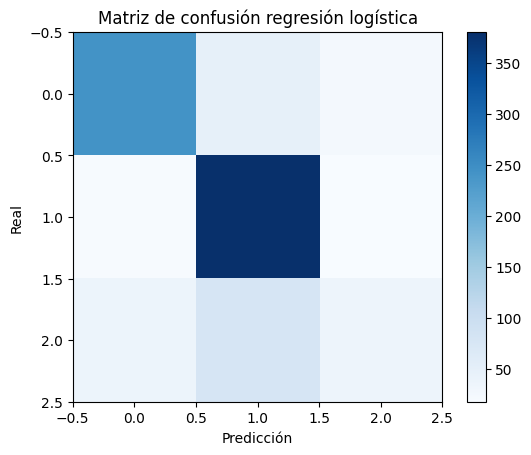

In [11]:
# Mostrar la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap="Blues")
plt.title("Matriz de confusión regresión logística")
plt.colorbar()
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Recordemos cual es cada clase

Dropout: 0

Graduate: 1

Enrolled': 2

In [12]:
# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       316
           1       0.75      0.91      0.82       418
           2       0.46      0.24      0.31       151

    accuracy                           0.74       885
   macro avg       0.67      0.64      0.64       885
weighted avg       0.72      0.74      0.72       885



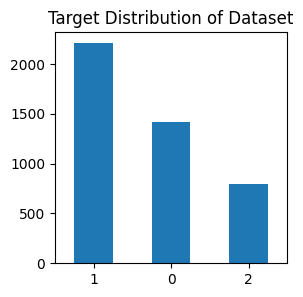

In [13]:
df = df[df.Target != "2"]
df["Target"].unique()
df
df["Target"].value_counts().plot(kind="bar", figsize=(3,3), title="Target Distribution of Dataset")
plt.xticks(rotation=0)
plt.show()